In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh, norm
from scipy.sparse.linalg import expm_multiply

from tqdm import tqdm

In [2]:
def time_evol(H,tstart=0,tstop=1,Num=100,N_em=1,psi=[1.]):
    
    n = np.shape(H)[0]-N_em
    psi_in = np.array([0.]*n + psi)

    temp = expm_multiply(-1.j*H,psi_in,tstart,tstop,Num)
    
    return temp[:,-N_em:], temp[:,:-N_em]

# Interaction of a single atom with a 1D simple chain

In [46]:
N = 300 #number of primitive cells
eps = 1. #on-site energy
gam = 1./2. #hopping term

omega0 = 1.0 #atom frequency
g = 0.1 #atom-cavity coupling

Definition of the hamiltonian.

In [47]:
H = np.diag([eps/2]*N + [omega0/2])
H += np.diag([-gam]*(N-1)+[0],k=1)

H[0,N-1] -= gam
H[N//2,-1] = g

H += np.conjugate(H.transpose())

In [48]:
eigvals, eigvect = eigh(H)

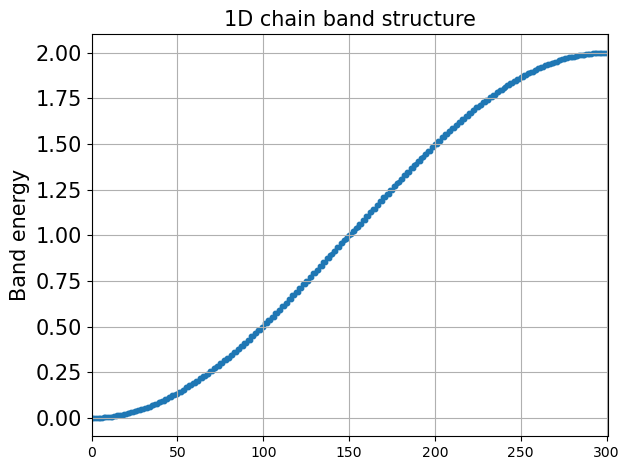

In [49]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("1D chain band structure",fontsize=15)
ax.set_ylabel("Band energy",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()
plt.show()

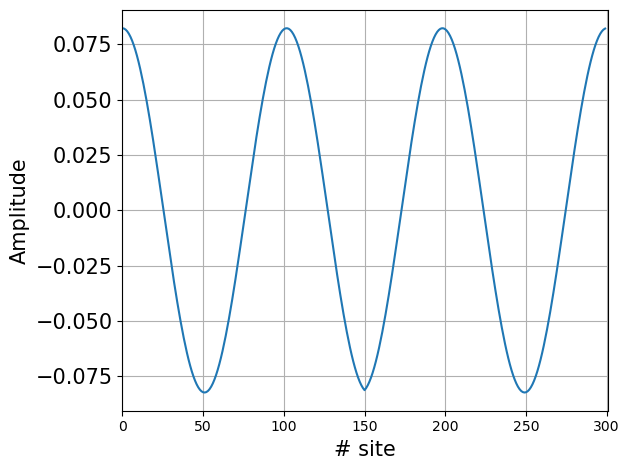

In [50]:
fig, ax = plt.subplots(tight_layout=True)

ax.plot(eigvect[:-1,5])

ax.set_xlabel("# site",fontsize=15)
ax.set_ylabel("Amplitude",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()

plt.show()

In [51]:
Pq = np.zeros(20)
q = np.linspace(1,20,20)
for i in range(20):
    for j in range(0,N,1):
        Pq[i] += np.sum(eigvect[:-1,j]**(2*q[i]))
    Pq[i] /= N

In [52]:
Pq

array([9.96666977e-01, 4.97941494e-03, 2.76752449e-05, 1.61661257e-07,
       9.72115668e-10, 5.95930806e-12, 3.70460706e-14, 2.32808019e-16,
       1.47613766e-18, 9.43236406e-21, 6.07017417e-23, 3.93343318e-25,
       2.56680693e-27, 1.68762394e-29, 1.11886875e-31, 7.48886863e-34,
       5.06817724e-36, 3.47449782e-38, 2.41798970e-40, 1.71203211e-42])

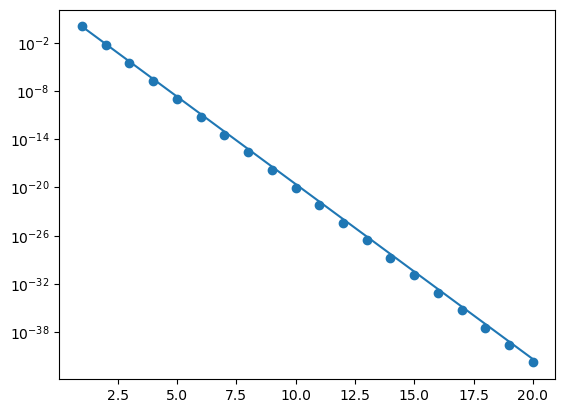

In [53]:
fig = plt.figure()

plt.scatter(q,Pq)
plt.plot(q,Pq[0]*(N*0.5)**(1-q))

plt.yscale("log")
plt.show()

# Disordered case

In [16]:
delta = [0.5,1,2,3,5,10]
nsim = 10
t = np.linspace(0,2000,500)
pop_at = np.zeros((len(delta),len(t)))

for i in tqdm(range(0, len(delta),1)):
    for j in range(nsim):
        rng = np.random.default_rng()
        nums = rng.uniform(-delta[i]/2,delta[i]/2,N)

        H = np.diag([eps/2]*N + [omega0/2])
        H += np.diag([-gam]*(N-1)+[0],k=1)

        # Diagonal disorder
        H += np.diag(np.append(nums/2,0))

        H[0,N-1] -= gam
        H[N//2,-1] = g

        H += np.conjugate(H.transpose())

        pop, _ = time_evol(H,t[0],t[-1],len(t))
        pop_at[i] += np.real(pop*np.conjugate(pop))[:,0]

    pop_at[i] /= nsim

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:34<00:00, 45.75s/it]


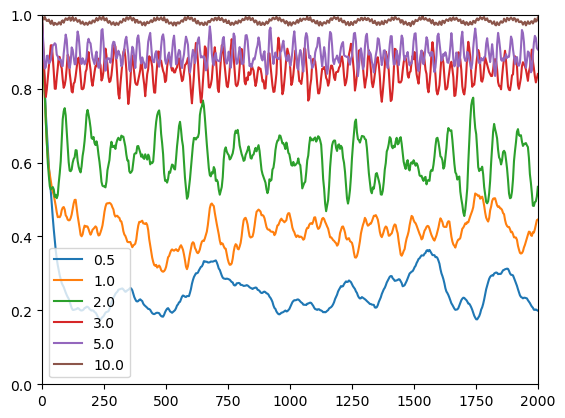

In [19]:
fig = plt.figure()

for i in range(len(delta)):
    plt.plot(t,pop_at[i],label=f"{delta[i]:.1f}")

plt.xlim(0,t[-1])
plt.ylim(0,1)
plt.legend()

plt.show()